In [42]:
#importing libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
#exploring the data

data=pd.read_csv(r'C:\Users\datta\OneDrive\Desktop\creditcard.csv')

In [3]:
#first 5 rows of the dataset

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#last 5 rows of the dadta set

data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
#information about dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#checking the number of missing values in each column

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
#distribution of legit transaction and fraudulent transactions
#0 represents legit transaction
#1 represents fraudulent transaction


data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
#seperating the data for analysis

legit=data[data.Class==0]
fraud=data[data.Class==1]

In [9]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
#comparing the values for both transactions

data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [12]:
legit_a=legit.sample(n=492)

In [13]:
#concatinating 2 data frames

new_data=pd.concat([legit_a,fraud],axis=0)

In [14]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [15]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
100079,67408.0,-0.291180,0.844801,-0.312009,-1.112434,2.519034,3.284019,0.145259,0.932031,-0.507127,...,-0.315839,-1.006189,-0.036596,0.934824,-0.004271,0.087852,0.245256,0.091413,8.95,0
119008,75293.0,1.443463,-0.721598,-1.173452,-1.748431,1.413624,3.219743,-1.023251,0.761467,-0.973972,...,-0.504360,-1.127015,0.075504,1.020470,0.303727,0.964015,-0.052951,0.003735,10.00,0
200506,133461.0,2.118453,0.052797,-2.399122,0.553999,0.497742,-1.805069,0.871637,-0.528929,0.198196,...,0.250005,0.796701,-0.153177,0.025357,0.584988,0.733191,-0.137227,-0.097377,10.00,0
182714,125518.0,-1.340750,-1.160259,-1.508062,-0.150320,-3.735383,2.231681,5.319082,-0.866882,-0.413271,...,0.466331,1.782226,0.986168,-0.220816,-0.608757,0.427101,0.577110,-0.047479,1138.07,0
267417,162765.0,-0.088212,-4.482032,-5.175083,-0.555105,1.484714,3.127603,1.548135,0.093688,-1.462444,...,0.625328,-0.408701,-1.115230,0.838920,0.099463,0.911576,-0.330181,0.111634,1215.51,0


In [16]:
new_data['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [17]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,90250.609756,0.081397,-0.063195,-0.061342,0.047139,0.043486,-0.041300,-0.004217,-0.060253,0.045312,...,-0.007062,-0.003482,-0.000786,-0.002519,-0.017489,0.044543,0.021742,-0.020978,-0.003196,89.400935
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [19]:

x=new_data.drop(columns='Class',axis=1)
y=new_data['Class']

In [20]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
100079   67408.0 -0.291180  0.844801 -0.312009 -1.112434  2.519034  3.284019   
119008   75293.0  1.443463 -0.721598 -1.173452 -1.748431  1.413624  3.219743   
200506  133461.0  2.118453  0.052797 -2.399122  0.553999  0.497742 -1.805069   
182714  125518.0 -1.340750 -1.160259 -1.508062 -0.150320 -3.735383  2.231681   
267417  162765.0 -0.088212 -4.482032 -5.175083 -0.555105  1.484714  3.127603   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [21]:
print(y)

100079    0
119008    0
200506    0
182714    0
267417    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [22]:
#spliting the data to train and test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [24]:
#training the model

model=LogisticRegression()

In [25]:
model.fit(x_train,y_train)

LogisticRegression()

In [30]:
#model evaluation
#accuracy of training data

x_train_p=model.predict(x_train)
train_data_accuracy=accuracy_score(x_train_p,y_train)



In [31]:
#printing the accuracy of training data

print(train_data_accuracy)

0.9390088945362135


In [32]:
#accuracy of test data

x_test_p=model.predict(x_test)
test_data_a=accuracy_score(x_test_p,y_test)

In [33]:
#prinitng the accuracy of test data

print(test_data_a)

0.9086294416243654


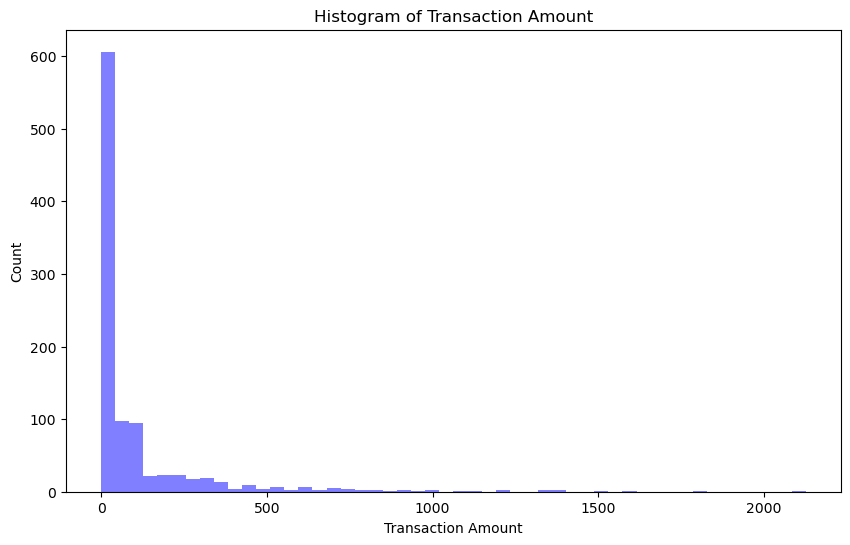

In [40]:


#  Histogram of the 'Amount' feature
plt.figure(figsize=(10, 6))
plt.hist(new_data['Amount'], bins=50, color='blue', alpha=0.5)
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.title('Histogram of Transaction Amount')
plt.show()



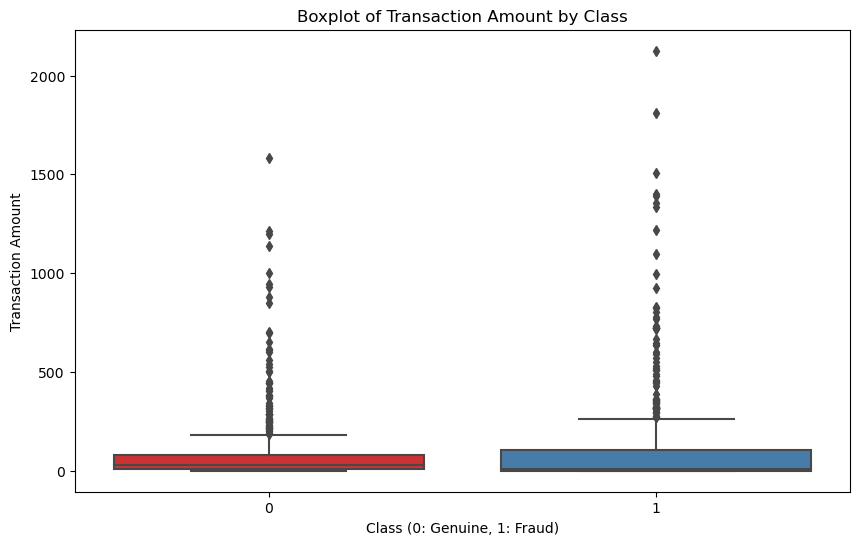

In [39]:
#  Boxplot of 'Amount' by class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=new_data, palette='Set1')
plt.xlabel('Class (0: Genuine, 1: Fraud)')
plt.ylabel('Transaction Amount')
plt.title('Boxplot of Transaction Amount by Class')
plt.show()



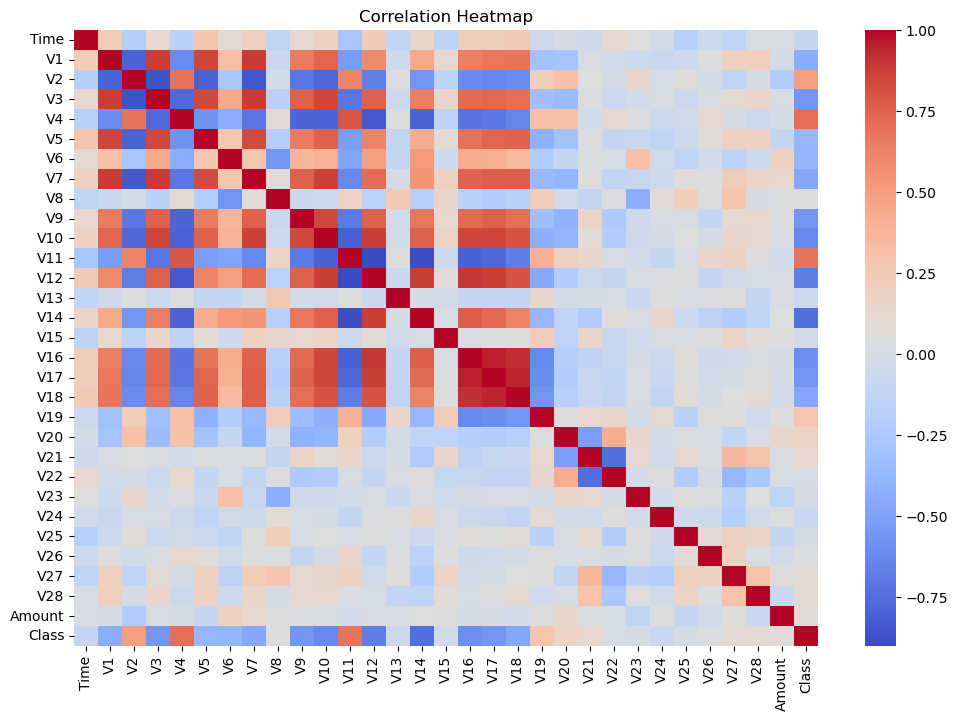

In [38]:
#  Correlation heatmap of features
corr_matrix = new_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


In [41]:


# Calculate the predictions on the test set
y_pred = model.predict(x_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Precision: 0.9347826086956522
Recall: 0.8775510204081632
F1-Score: 0.9052631578947369
